In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-qa-question-type-reason-explanation/google_qa_question_type_reason_explanation.csv


In [2]:
import csv
file_path = "/kaggle/input/google-qa-question-type-reason-explanation/google_qa_question_type_reason_explanation.csv"

df = pd.read_csv(
    file_path,
    on_bad_lines='skip',         # skip broken lines
    quoting=csv.QUOTE_ALL,       # handle comma inside quotes
    encoding='utf-8',
    low_memory=False
)

print("Shape:", df.shape)
df.head()

Shape: (3898, 42)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,,,,,,,,,,,,,,,,,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written,Unnamed: 41
6803,'Create Valid XML from XSD Loaded at Runtime (without xsd.exe)','\n Possible Duplicate:\n \n \n Programmatically Create XML File From XSD \n XML instance generation from XML schema (xsd)\n How to generate sample XML documents from their DTD or XSD?\n \n\n\n\n\nHere\'s the scenario: I\'ve created an application that hooks into a commercial CRM product using their web service API,which unfortunately has a different schema for every installation,based on how the users create their custom fields. This schema can also be modified at any time. This application will be installed at the customer location,and will need to function even when they change their field structure.\n\nIn order to insert or update a record,I first call their Project.GetSchema() method,which returns the XSD file based on the current set of fields,and then I can call the Project.AddProject() method,passing in an XML file containing the project data.\n\nMy question is: What\'s the best way to generate the XML from the XSD file at runtime? I need to be able to check for the existence of fields,and fill them out only if they exist (for instance,if the customer deleted or renamed some fields). \n\nI really don\'t want to have the application attempting to recompile classes on the fly using xsd.exe. There simply must be a better way.\n\n[update] My current solution,that I\'m working on,is to basically parse out the XSD file myself,since the majority of the schema is going to be the same for each installation. It\'s just an ugly solution,and I was hoping there was a better way. The biggest problem I have is that their schema uses xsd:sequence,so putting things in a different order always breaks validation.\n','The How-To Geek',https://stackoverflow.com/users/291,'For others that wound up here: the best solut...,create XML at runtime and using .NET,is probably the first link: \nIs there a clas...,that\'s what I am going to try :). \n',ginbot,https://stackoverflow.com/users/444803,http://stackoverflow.com/questions/2170614/cre...,STACKOVERFLOW,...,0.888889,0.666667,1.0,1.000000,0.933333,1.0,0.333333,0.0,1.0,NaN
1334,'hard self collision: make particles occupy space','By default,Blender\'s particles don\'t have any spatial extension. This is fine as long as particles are rendered as halos. But if you give them a size and an appearance as object,it becomes obvious that they\'re able to go through each other.\n\nWhat tricks can be pulled off to fix that problem?\nFor example,if you want to fill an area with houses,toss some leaves onto the floor,or just want charged balls to stick to each other.\n\nI\'m aware that a precise solution of this problem is very challenging -- but already some kind of approximation would do in most cases.\n',Ichthyo,https://blender.stackexchange.com/users/2615,'There is an add on called Molecular. http://pyroevil.com/molecular-script-download/. It makes the particles act as rigid bodies. The particles can be linked to each other as well. \n\nHere is a little teaser trailer the creator made: https://www.youtube.com/watch?v=_5QkPnPDcfc. I hope this helps!\n','Nathan Craddock',https://blender.stackexchange.com/users/5505,http://blender.stackexchange.com/questions/7633/hard-self-collision-make-particles-occupy-space,TECHNOLOGY,blender.stackexchange.com,1.0,0.5555555555555556,0.0,0.6666666666666666,0.6666666666666666,0.6666666666666666,0.5555555555555556,0.4444444444444444,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
869,'Removing unwanted color from B&W image (aperture)','I\'ve been shooting ilford color-process b&amp;w film.\n\nThe local photo processor\'s equipment has a glitch; some

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3898 entries, (6803, "'Create Valid XML from XSD Loaded at Runtime (without xsd.exe)'", "'\\n  Possible Duplicate:\\n  \\n  \\n  Programmatically Create XML File From XSD  \\n  XML instance generation from XML schema (xsd)\\n  How to generate sample XML documents from their DTD or XSD?\\n  \\n\\n\\n\\n\\nHere\\'s the scenario: I\\'ve created an application that hooks into a commercial CRM product using their web service API", ' which unfortunately has a different schema for every installation', ' based on how the users create their custom fields. This schema can also be modified at any time. This application will be installed at the customer location', ' and will need to function even when they change their field structure.\\n\\nIn order to insert or update a record', ' I first call their Project.GetSchema() method', ' which returns the XSD file based on the current set of fields', ' and then I can call the Project.AddProject() method',

In [4]:
df.isnull().sum()

qa_id                                       0
question_title                              0
question_body                               0
question_user_name                          0
question_user_page                          0
answer                                      0
answer_user_name                            0
answer_user_page                            0
url                                         0
category                                    0
host                                        0
question_asker_intent_understanding         0
question_body_critical                      0
question_conversational                     0
question_expect_short_answer                0
question_fact_seeking                       0
question_has_commonly_accepted_answer       0
question_interestingness_others             0
question_interestingness_self               0
question_multi_intent                       0
question_not_really_a_question              0
question_opinion_seeking          

In [5]:
df.duplicated().sum()

4

In [6]:
df.drop(columns=['Unnamed: 41'], inplace=True)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3894 entries, (6803, "'Create Valid XML from XSD Loaded at Runtime (without xsd.exe)'", "'\\n  Possible Duplicate:\\n  \\n  \\n  Programmatically Create XML File From XSD  \\n  XML instance generation from XML schema (xsd)\\n  How to generate sample XML documents from their DTD or XSD?\\n  \\n\\n\\n\\n\\nHere\\'s the scenario: I\\'ve created an application that hooks into a commercial CRM product using their web service API", ' which unfortunately has a different schema for every installation', ' based on how the users create their custom fields. This schema can also be modified at any time. This application will be installed at the customer location', ' and will need to function even when they change their field structure.\\n\\nIn order to insert or update a record', ' I first call their Project.GetSchema() method', ' which returns the XSD file based on the current set of fields', ' and then I can call the Project.AddProject() method',

In [7]:
target_cols = [
    'answer_helpful', 'answer_level_of_information', 'answer_plausible',
    'answer_relevance', 'answer_satisfaction', 'answer_type_instructions',
    'answer_type_procedure', 'answer_type_reason_explanation', 'answer_well_written'
]
df_model = df[df[target_cols].notnull().any(axis=1)].reset_index(drop=True)

print("New shape after cleaning:", df_model.shape)
df_model[target_cols].isnull().sum()

New shape after cleaning: (1356, 41)


answer_helpful                       0
answer_level_of_information        233
answer_plausible                   438
answer_relevance                   615
answer_satisfaction                803
answer_type_instructions           952
answer_type_procedure             1087
answer_type_reason_explanation    1197
answer_well_written               1274
dtype: int64

In [8]:
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = BeautifulSoup(text, "html.parser").get_text()
    text = text.lower()
    text = re.sub(r"[^a-z\s]", " ", text)  # only alphabetic characters
    text = re.sub(r"\s+", " ", text).strip()
    # Remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:

df_model['question_body_clean'] = df_model['question_body'].apply(clean_text)
df_model['answer_clean'] = df_model['answer'].apply(clean_text)
df_model['qa_combined'] = df_model['question_body_clean'] + " " + df_model['answer_clean']


df_model = df_model[df_model['qa_combined'].str.len() > 20].reset_index(drop=True)


print("Final cleaned dataset:", df_model.shape)
df_model[['qa_combined']].sample(3)


Final cleaned dataset: (975, 44)


/tmp/ipykernel_13/1958931967.py:12: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  text = BeautifulSoup(text, "html.parser").get_text()
/tmp/ipykernel_13/1958931967.py:12: MarkupResemblesLocatorWarning: The input passed

,qa_combined
664,even protocols similar identical ii iii phase ...
669,https sharepoint stackexchange com users share...
611,showing trainings whose registration deadlines...


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # You can tune n-grams and max_features
X = tfidf.fit_transform(df_model['qa_combined'])

print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (975, 5000)


In [11]:

target_cols = [
    'answer_helpful', 'answer_level_of_information', 'answer_plausible',
    'answer_relevance', 'answer_satisfaction', 'answer_type_instructions',
    'answer_type_procedure', 'answer_type_reason_explanation', 'answer_well_written'
]


df_targets = df_model[target_cols].dropna()
X_filtered = X[df_targets.index]  


In [12]:
import sklearn
import scipy
print("scikit-learn version:", sklearn.__version__)
print("scipy version:", scipy.__version__)


scikit-learn version: 1.2.2
scipy version: 1.15.2


In [13]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_filtered, df_targets, test_size=0.2, random_state=42)

# Use solver='lsqr' for sparse-safe regression
model = MultiOutputRegressor(Ridge(alpha=1.0, solver='lsqr'))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")


✅ RMSE: 0.1868
✅ R² Score: -0.0802


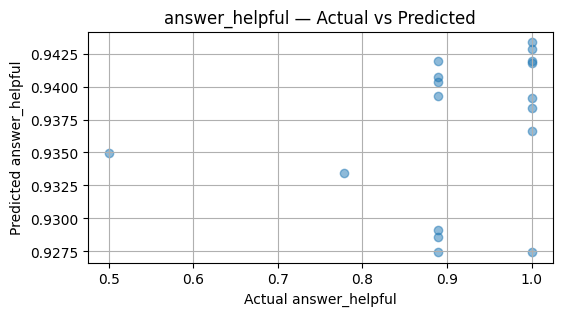

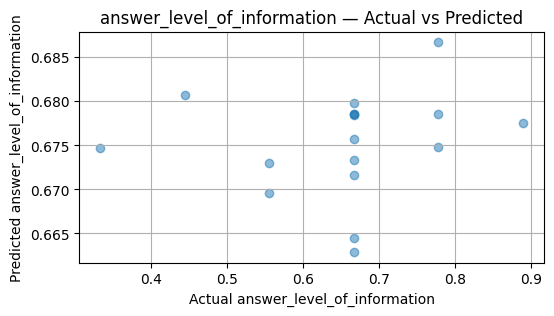

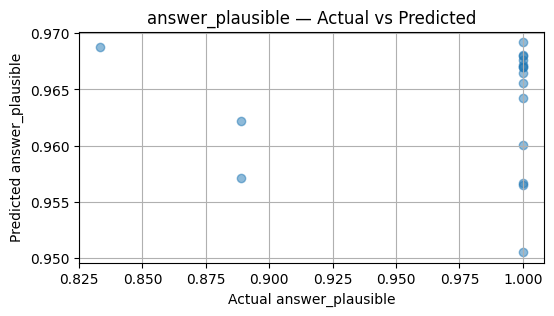

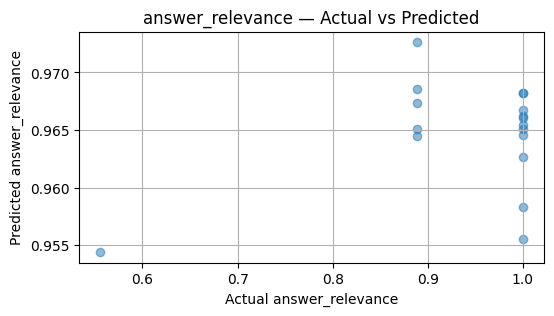

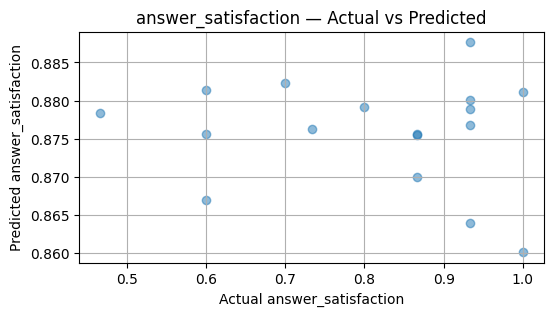

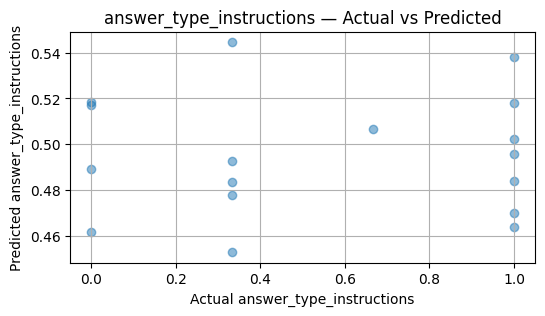

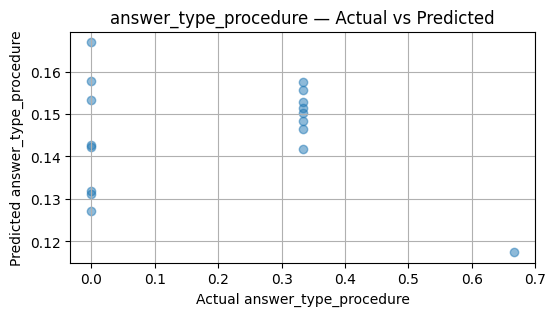

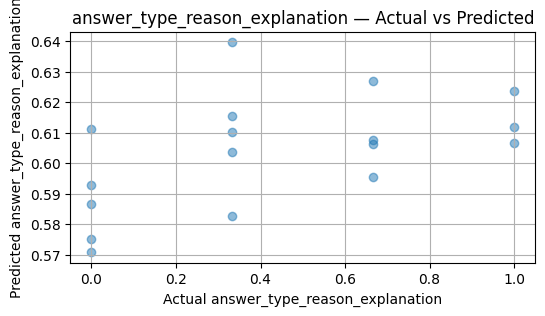

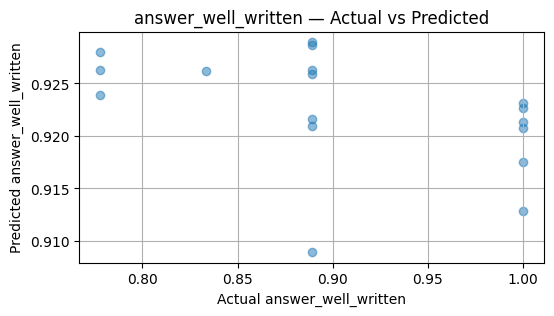

In [14]:
import matplotlib.pyplot as plt
import numpy as np

target_cols = df_targets.columns

for i, col in enumerate(target_cols):
    plt.figure(figsize=(6, 3))
    plt.scatter(y_test[col], y_pred[:, i], alpha=0.5)
    plt.xlabel(f"Actual {col}")
    plt.ylabel(f"Predicted {col}")
    plt.title(f"{col} — Actual vs Predicted")
    plt.grid(True)
    plt.show()


In [15]:
!pip install -U sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.9.90
    Uninstalling nvidia-curand-cu12-1

In [16]:
from sentence_transformers import SentenceTransformer


bert_model = SentenceTransformer('all-MiniLM-L6-v2')


2025-05-02 08:14:13.217085: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746173653.431515      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746173653.495324      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [17]:

X_bert = bert_model.encode(df_model['qa_combined'].tolist(), show_progress_bar=True)


Batches:   0%|          | 0/31 [00:00<?, ?it/s]

In [18]:
df_targets = df_model[target_cols].dropna()
X_bert_filtered = X_bert[df_targets.index]


In [19]:

from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_bert_filtered, df_targets, test_size=0.2, random_state=42)

model2 = MultiOutputRegressor(Ridge(alpha=1.0))
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)


rmse = mean_squared_error(y_test, y_pred2, squared=False)
r2 = r2_score(y_test, y_pred2)

print(f"✅ RMSE (BERT): {rmse:.4f}")
print(f"✅ R² Score (BERT): {r2:.4f}")


✅ RMSE (BERT): 0.1834
✅ R² Score (BERT): -0.0719


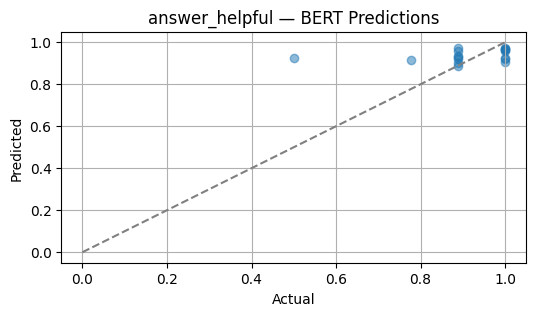

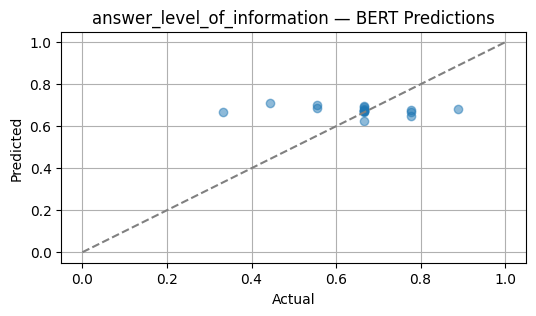

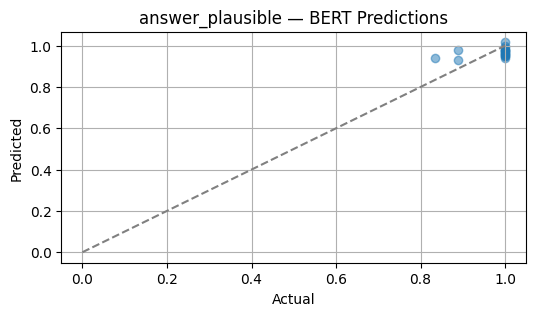

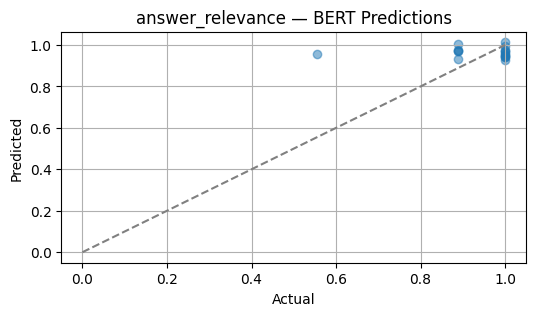

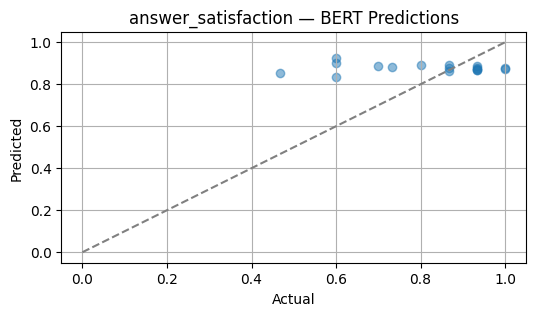

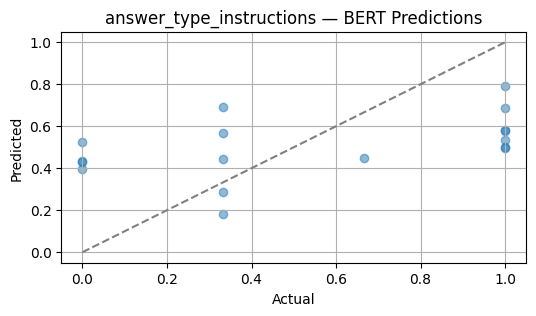

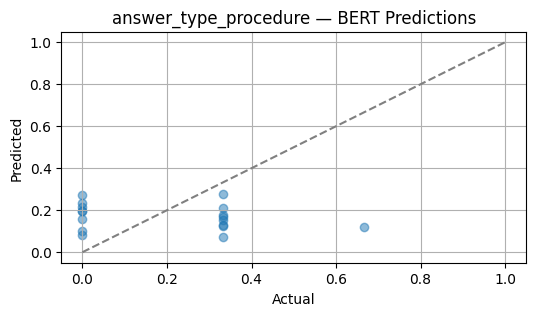

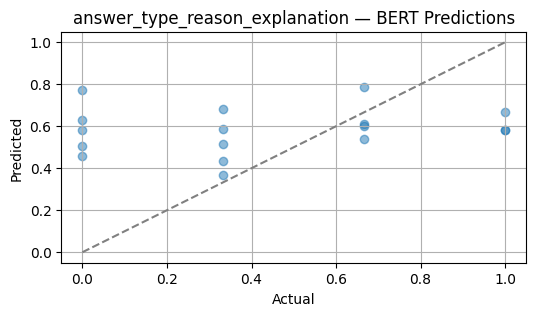

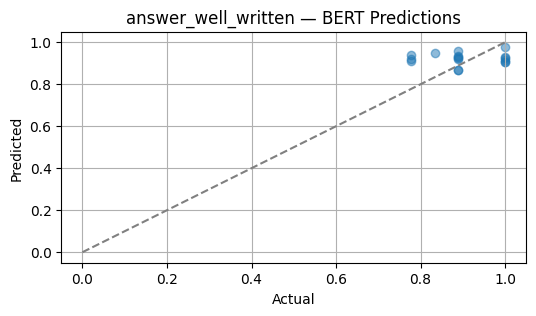

In [20]:
import matplotlib.pyplot as plt

for i, col in enumerate(df_targets.columns):
    plt.figure(figsize=(6, 3))
    plt.scatter(y_test[col], y_pred2[:, i], alpha=0.5)
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{col} — BERT Predictions")
    plt.grid(True)
    plt.show()


In [21]:
df_model.to_csv("google=quest.csv")